## Arrays
Array is a data structure that stores similar elements, such as integers, characters, floats ... etc.  
![Screenshot from 2025-08-12 23-18-58.png](<attachment:Screenshot from 2025-08-12 23-18-58.png>)  
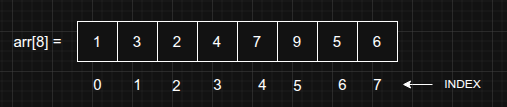

In python arrays are defined using list like  
a = [1,3,2,4,7,9,5,6]  
the first index is 0 and last is n-1  

In [10]:
a = [1,3,2,4,7,9,5,6]
# access elements
print(a[0])
print(a[4])
# get the length of the array
print(len(a))

1
7
8


### Largest element in the array

In [11]:
large = 0 # initial set largest to zero
for i in a:
    if i>large: # loop through the array and compare each element with large
        large = i # update the large every time a element greater than it is found
print(large)

9


### Second largest element in array

In [12]:
# Brute force
# sort the array first
a = [1,2,4,7,7,5]
a.sort()
large = a[len(a)-1] # get the largest stored at end of sorted array
for i in range(len(a)-1,-1,-1): # start reverse for loop
    if a[i] < large:
        second = a[i]
        break
print(second)
# time complexity : O(n x log(n) + n)
# better solution
a = [1,2,4,7,7,5]
# first find largest
large = a[0]
for i in a:
    if i > large:
        large = i
# next find second largest which is less than the largest
second = a[0]
for i in a:
    if i > second and i < large:
        second = i
print(second)
# optimal 
large = 0
second = 0
for i in a:
    if i > large:
        second = large # second becomess previous large value
        large = i # large is updated
    elif i > second and i < large:
        second = i

print(second)
# time complexity: O(n)

5
5
5


### Check if array is sorted or not


In [13]:
# Method 1: Check each element is greater than its preceeding element
a = [1,2,3,4,5]
issort = "Yes"
for i in range(1,len(a)):
    if i!=(len(a)-1):
        if a[i]>=a[i-1]:
            continue
        else:
            issort = "False"
            break
print(issort)

Yes


### Removing duplicate elements from the array

In [14]:
# Brute force approach
# create a set and put each element in the set
arr = [1,1,2,2,2,3,3]
s = set()
for i in arr:
    s.add(i)

print(s)
# Time complexity of inserting in set is log(n)
# Total time complexity is O(n x log(n))
# Optimal
# Use 2 pointers
arr = [1,1,2,2,2,3,3]
i = 0 # move the pointer if we find a unique value other than this
for j in range(len(arr)):
    if arr[j]!=arr[i]: # if find a unique, put it in next position from i
        arr[i+1] = arr[j]
        i+=1 # move first pointer
print(arr[:i+1])
# Time complexity is O(n)

{1, 2, 3}
[1, 2, 3]


### Rotate the array by one place

In [ ]:
# Rotating left means taking element from first place and pushing it to last
arr = [1,2,3,4,5] # for one place remove i from first and put it in last
temp = arr[0] # Store first element in temprary place
for i in range(1,len(arr)):
    arr[i-1] = arr[i] # push elements to previous position
    if i == len(arr) - 1:
        arr[i] = temp # if i reachs last, the last element will be the temp 

print(arr)

[2, 3, 4, 5, 1]


### Rotate the array by D places

In [ ]:
# brute force
arr = [1,2,3,4,5,6,7]
d = 3
temp = arr[:d] # store first d elements as temp
for i in range(d,len(arr)):
    # move elements back to d places
    arr[i-d] = arr[i]

# Put elements in temp to end of arr starting with d+1
for j in range(d+1,len(arr)):
    arr[j] = temp[j-(d+1)] # d+1 is base index, so subtracting it everytime will us 0,1,2,....
    
    
print(arr)

# time complexity of puting from temp back to array and extracting to store in temp: O(d)
# time complexity of pushing back elements: O(n-d)
# O(d) + O(n-d) + O(d) = O(n+d)
# space complexity is O(d) because of temp


[4, 5, 6, 7, 1, 2, 3]


In [ ]:
# Optimal solution
# reverse first d elements
# reverse elements after d
# reverse the array
arr = [1,2,3,4,5,6,7]
d = 3
# reverse d elements
i=0
j=d-1
while i<(len(arr[:d])/2) and j>(len(arr[:d])/2):
    arr[i],arr[j] = arr[j],arr[i]
    i+=1
    j-=1 
# reverse elements after first d elements
i=d
j=len(arr)-1
while i<(len(arr[d:])/2 + len(arr[:d])) and j>(len(arr[d:])/2):
    arr[i],arr[j] = arr[j],arr[i]
    i+=1
    j-=1
# reverse the array itself
i = 0
j = len(arr)-1
while i<(len(arr)/2) and j>(len(arr)/2):
    arr[i],arr[j] = arr[j],arr[i]
    i+=1
    j-=1
print(arr)
# time complexity of reversing first d elements: O(d)
# time complexity of reversing elements after d elements: O(n-d)
# time complexity of reversing full array: O(n)
# total time complexity: o(d) + O(n-d) + O(n) = O(n)
# Space complexity: O(1)

[4, 5, 6, 7, 1, 2, 3]


### Move all zeroes to end of the array


In [ ]:
# Brute force
arr = [1,0,2,3,2,0,0,4,5,1]
# pick all non-zero numbers and store it somewhere
temp = []
for i in arr:
    if i!=0:
        temp.append(i)
# pick everything from temp and put back in array
for i in range(len(temp)):
    arr[i] = temp[i]
# Fill the end place starting from len(temp) with zeroes
for i in range(len(temp),len(arr)):
    arr[i] = 0
print(arr)
# time complexity of step 1: O(n)
# time complexity of step 2: O(x)
# time comlexity of step 3: O(n-x)
# total time complexity: O(n)
# space complexity: O(x), worst case scenario O(n)

[1, 2, 3, 2, 4, 5, 1, 0, 0, 0]


In [ ]:
# Optimal
arr = [1,0,1,0,0]
i = 0 # this pointer holds how shifts a non-zero elements should do after consecutive zeroes are found
c = 0 # to hold the index from where zeroes start at the end (stores also number of non-zero elements)
for j in range(len(arr)):
    if arr[j]==0:
        i+=1
        continue
        # counting consecutive zeroes
    arr[j-i] = arr[j] # shift elements
    c+=1

for j in range(c,len(arr)):
    # store zero at end starting from c pointer
    arr[j] = 0

print(arr)
# Time complexity is O(n)
# Space complexity is O(1)

[1, 1, 0, 0, 0]


In [ ]:
# Optimal 2
arr = [1,0,2,3,2,0,0,0,4,5,1]
j = -1 # this pointer is updated if 0 is encountered
for i in range(len(arr)):
    if arr[i]==0:
        j = i
        break
        # break at the point when is found
if j != -1:
    for i in range(j+1,len(arr)):
        # start the loop from j+1
        if arr[i]!=0:
            # if i is non-zero, swap it with j and update j
            arr[j],arr[i] = arr[i],arr[j]
            j+=1
print(arr)
# Time complexity: O(n)
# Space complexity: O(1)

[1, 2, 3, 2, 4, 5, 1, 0, 0, 0, 0]


### Linear Search

In [21]:
# Loop through the array from start to end
arr = [6,7,8,4,1]
num = 4
for i in range(len(arr)):
    if arr[i] == num:
        print(i)
        break

3


### Union and Intersection of two sorted arrays

In [25]:
arr1 = [1,1,2,3,4,5]
arr2 = [2,3,4,4,5]
union = []
intersection = []
# Using set
s = set()
for i in arr1:
    s.add(i)
for i in arr2:
    s.add(i)
union = list(s)
print(union)
for i in union:
    if (i in arr1) and (i in arr2):
        intersection.append(i)
print(intersection)

[1, 2, 3, 4, 5]
[2, 3, 4, 5]


In [ ]:
# Using 2 pointer
arr1 = [1,1,2,3,4,5]
arr2 = [2,3,4,4,5,6]
union = []
intersection = []
i = 0 # pointer on first array
j = 0 # pointer on second array
while i<len(arr1) and j<len(arr2):
    if arr1[i]<arr2[j]:
        if arr1[i] not in union:
            union.append(arr1[i])
        i+=1
    else:
        if arr2[j] not in union:
            union.append(arr2[j])
        j+=1
for i in range(i,len(arr1)):
    union.append(arr1[i])
for i in range(j,len(arr2)):
    union.append(arr2[i])
print(union)
for i in union:
    if i in arr1 and i in arr2:
        intersection.append(i)
print(intersection)
# time complexity: O(n1 + n2)
# space complexity: O(n1 + n2) is for returning the answer

[1, 2, 3, 4, 5, 6]
[2, 3, 4, 5]


### Finding missing numbers in an array
A array is given arr = [1,2,4,5] and n = 5. The length of array is n-1 and it should contain numbers from 1 to n. We have to find which number is missing from 1 to n.

In [7]:
# brute force: using linear search
arr = [1,2,4,5]
n = 5
# use for loop and if each number is there or not, indexing starts from 0 so we use +1
for i in range(1,n+1):
    flag = 0
    for j in range(len(arr)):
        if arr[j]==i:
            flag = 1 # if number is there flag will be 1
            break
    if flag == 0:
        print(i)
        break
# In worst case scenario the time complexity is O(n^2)

3


In [ ]:
# Better solution: using hashing
arr = [1,2,4,5]
h = [0]*(len(arr)+2)
for i in arr:
    h[i] = 1 # map each element as index in hash array

for i in range(1,len(h)):
    if h[i] == 0:
        print(i) # print the index where element was not mapped initially
        break
# Time complexity is O(n)+O(n) = O(2n)
# space complexity: since we are using hash array = O(n+2)

3


In [ ]:
# Optimal solution
# Sum
n = 5
arr = [1,2,4,5]
# find sum from 1 to n
s1 = 0
for i in range(1,n+1):
    s1+=i
print(s1)
# find sum of all elements in array
s2 = 0
for i in arr:
    s2+=i
print(s2)
# s1 - s2 will be the missing number
if (s1-s2) != 0:
    print("missing",s1-s2)
# Time complexity is O(n)
# space comlexity is O(1)

15
12
missing 3


In [ ]:
n = 5
arr = [1,2,4,5]
# Using xor 
# logic: (1^1)^(2^2)^(3)^(4^4)^(5^5)
# Xor with same number is 0 so at the end it will be (0^3)
# xor with any number is the number itself: (0^3) = 3 (missing number)
xor1 = 0
for i in range(1,n+1):
    xor1^=i
xor2 = 0
for i in arr:
    xor2^=i

print(xor1 ^ xor2)

3


### Maximum consecutive ones
Consider the array: [1,1,0,1,1,1,0,1,1] we have to find for how many consecutive 1s are there, and maximum out of it.

In [18]:
arr = [1,1,0,1,1,1,0,1,1]
cons1 = 0 # sum of consecutive 1s
max1 = 0 # sum of maximum number of consecutive 1s
for i in arr:
    if i!=0:
        cons1+=1
        if max1 < cons1:
            max1+=1
    else:
        cons1 = 0
        # set cons1 to 0 if 0 is encountered
print(max1)
# Time complexity is O(n)
# Space complexity is O(1)

3


### Find the number that appears once, and other number twice
Consider the given array: [1,1,2,3,3,4,4], every number appears twice except 1 number we have to find that one number.

In [ ]:
# Brute force
arr = [1,1,2,3,3,4,4]
# the array is sorted and is in sequence (1,2,3,4,....)
for i in range(len(arr)):
    num = arr[i]
    counter = 0 # keep the number of time a number is appeared
    for j in range(len(arr)):
        if arr[j] == num:
            counter+=1
        else:
            # break if new number is found
            continue
    if counter !=2:
        # is counter is not 2 return the number
        print("Number is",num)
        break

# Time complexity: O(n x n)
# space complexity: O(1)

Number is 2


In [ ]:
# Using hash array
arr = [1,1,2,3,3,4,4]
h = [0]*(max(arr)+1)
for i in arr:
    h[i]+=1
for i in range(1,len(h)):
    if h[i] < 2:
        print("Number is",i)
        break
# Time complexity is O(2n)
# Space complexity is O((n+3)/2) since max is 4, n will 2*4-1(1 is single) = 7
# hash has 5 elements it is obtained by (7+3) / 2

Number is 2


In [ ]:
# Using 2 pointer
arr = [1,1,2,3,3,4,4]
i = 0 # update when new item is encountered
j = 0 # loop through the array
c = 0 # update counter at arr[i]
while j<len(arr):
    if arr[j]==arr[i]:
        c+=1
    else:
        # if new number is found check first counter < 2
        if c<2:
            print("Number is",arr[i])
            break
        # set counter to 1 since new element is appeared first time
        c = 1
        # update i to the new number
        i = j
    j+=1
# if the end element is the answer check again for counter of end element
if c<2 and j>=len(arr):
    print("Number is",arr[i])

# Time complexity is O(n)
# Space complexity is O(1)

Number is 2


In [ ]:
# Using xor
arr = [1,1,2,3,3,4,4] # is number is appears twice then they will cancel out each other
# One number which is odd will remain
xor = 0
for i in arr:
    xor^=i
print("Number is",xor)
# Time complexity is O(n)
# Space complexity is O(1)

Number is 2


### Longest subarray with sum k
***Subarray*** : Contigous part of the array.  
Consider array: [1,2,3,1,1,1,1,4,2,3]  
subarray can be [1],[1,1,1],[1,2,3,1].....etc  
but [1,4,3] cannot be subarray because elements are not contiguos  

We have found longest subarray whose sum is k

To generate all sub arrays use pointers i and j, each subarray will be i - j  
- i = 1  
[1]  
[1,2]  
[1,2,3]  
[1,2,3,1]  
.  
.  
.  
- i = 2  
[2]  
[2,3]  
[2,3,1]  
.  
.  
.  

And so on upto i is last element

In [43]:
# Generating all sub arrays
arr = [1,2,3,1,1,1,1,4,2,3]
sub = []
for i in range(len(arr)):
    for j in range(i,len(arr)):
        sub.append(arr[i:j+1])
print(sub)
print(len(arr))
print(len(sub))

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 1], [1, 2, 3, 1, 1], [1, 2, 3, 1, 1, 1], [1, 2, 3, 1, 1, 1, 1], [1, 2, 3, 1, 1, 1, 1, 4], [1, 2, 3, 1, 1, 1, 1, 4, 2], [1, 2, 3, 1, 1, 1, 1, 4, 2, 3], [2], [2, 3], [2, 3, 1], [2, 3, 1, 1], [2, 3, 1, 1, 1], [2, 3, 1, 1, 1, 1], [2, 3, 1, 1, 1, 1, 4], [2, 3, 1, 1, 1, 1, 4, 2], [2, 3, 1, 1, 1, 1, 4, 2, 3], [3], [3, 1], [3, 1, 1], [3, 1, 1, 1], [3, 1, 1, 1, 1], [3, 1, 1, 1, 1, 4], [3, 1, 1, 1, 1, 4, 2], [3, 1, 1, 1, 1, 4, 2, 3], [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 4], [1, 1, 1, 1, 4, 2], [1, 1, 1, 1, 4, 2, 3], [1], [1, 1], [1, 1, 1], [1, 1, 1, 4], [1, 1, 1, 4, 2], [1, 1, 1, 4, 2, 3], [1], [1, 1], [1, 1, 4], [1, 1, 4, 2], [1, 1, 4, 2, 3], [1], [1, 4], [1, 4, 2], [1, 4, 2, 3], [4], [4, 2], [4, 2, 3], [2], [2, 3], [3]]
10
55


In [ ]:
# Brute force: generating all subarrays
arr = [1,2,3,1,1,1,1,4,2,3]
k = 3
maxl = 0
for i in range(len(arr)):
    for j in range(i,len(arr)):
        # loop for finding sum
        s = 0
        l = i
        while l<=j:
            s+=arr[l]
            l+=1
        if s==k:
            # is sum is equal to k the update the length
            if maxl < (j-i+1):
                maxl = j-i+1
print(maxl)
# Time complaxity is of O(n^3) cause we are using 3-level nested loop 
# Space complexity is O(1)

3
[1, 2, 3, 1, 1, 1, 1, 4, 2, 3]


In [61]:
# Using hash map (dictionary in python)
d = {} 
s = 0 # update sum after each iteration
maxl = 0
for i in range(len(arr)):
    s+=arr[i]
    if s not in d.keys():
        d[s] = i
    if s==k:
        # sum is equal to k maxl will be that index
        maxl = max(maxl,i+1)
    rem = s-k
    if rem in d.keys():
        if i-d[rem] > maxl:
            maxl = max(maxl,i-d[rem])
print(d)
print(max1)


{1: 0, 3: 1, 6: 2, 7: 3, 8: 4, 9: 5, 10: 6, 14: 7, 16: 8, 19: 9}
3
